In [1]:
import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline
pd.set_option('display.max_columns', None);

In [2]:
def create_aggregate_df(path):
    files = os.listdir(path);
    if files[0] == '.DS_Store': #ignore the .DS_Store file that may show up first
        files = files[1:];
    full_path = path + files[0]
    result_df = pd.read_csv(full_path, low_memory=False);
    for file in files[1:]:
        print(file);
        full_path = path + file;
        new_df = pd.read_csv(full_path);
        result_df = pd.concat([result_df, new_df]);
    return result_df;

In [3]:
#combine the dataframes together
#read in accepted loan data
path = "../data/2014_loan_data/";
loans_2014_all = create_aggregate_df(path);
display(loans_2014_all.head());

LoanStats_2014_B.csv


/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


LoanStats_2014_C.csv
LoanStats_2014_D.csv


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42.0,NaN,17,0,6133,31.6%,36,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000.0,Verified,Dec-2014,Current,n,NaN,NaN,car,Car financing,953xx,CA,8.31,1,Oct-2000,0,17.0,NaN,8,0,5753,100.9%,13,w,4293.16,4293.16,14398.47,14398.47,8506.84,5891.63,0.0,0.00,0.0000,Oct-2018,31

In [4]:
#take a quick peek to make sure data was read in properly
print(loans_2014_all.shape);
display(loans_2014_all.head())

(235629, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42.0,NaN,17,0,6133,31.6%,36,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000.0,Verified,Dec-2014,Current,n,NaN,NaN,car,Car financing,953xx,CA,8.31,1,Oct-2000,0,17.0,NaN,8,0,5753,100.9%,13,w,4293.16,4293.16,14398.47,14398.47,8506.84,5891.63,0.0,0.00,0.0000,Oct-2018,31

In [5]:
#do a groupby on loan status to see how many are usable
display(loans_2014_all.groupby("loan_status").size())

loan_status
Charged Off            40397
Current                17130
Default                   25
Fully Paid            177018
In Grace Period          344
Late (16-30 days)        166
Late (31-120 days)       549
dtype: int64

In [6]:
#remove any current loan
loans_2014_all_done = loans_2014_all[loans_2014_all.loan_status != "Current"];
print("Left with {0} non-current loans".format(loans_2014_all_done.shape[0]));

Left with 218499 non-current loans


In [7]:
del(loans_2014_all_done['id'])
del(loans_2014_all_done['member_id'])
display(loans_2014_all_done.head())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42.0,NaN,17,0,6133,31.6%,36,w,0.0,0.0,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,0.0,0.0,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,Dec-2014,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0,Aug-2002,1,NaN,NaN,11,0,16822,91.9%,20,f,0.0,0.0,2281.98,2281.98,704.38,339.61,0.0,1237.99,222.8382,Aug-2015,17.70,NaN,Oct-2016,0,NaN,1,Indiv

In [8]:
loans_2014_all_done['default'] = 1;
loans_2014_all_done.loc[loans_2014_all_done.loan_status == 'Fully Paid', 'default'] = 0;
loans_2014_all_done.head()

/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default
0,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42.0,NaN,17,0,6133,31.6%,36,w,0.0,0.0,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,0.0,0.0,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
3,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,Dec-2014,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0,Aug-2002,1,NaN,NaN,11,0,16822,91.9%,20,f,0.0,0.0,2281.98,2281.98,704.38,339.61,0.0,1237.99,222.8382,Aug-2015,17.70,NaN,Oct-2016,0

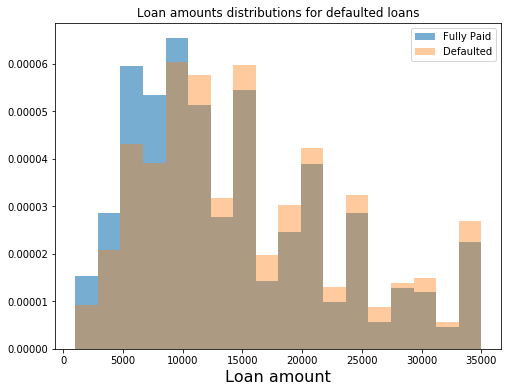

In [9]:
fig = plt.figure(figsize=(8,6));
ax = plt.subplot(1,1,1);
f_size=16;

ax.set_xlabel('Loan amount', fontsize= f_size);
ax.set_title('Loan amounts distributions for defaulted loans')

ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 0, 'loan_amnt'], bins=18, density=True, label='Fully Paid', alpha=0.6);
ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 1, 'loan_amnt'], bins=18, density=True, label='Defaulted', alpha=0.4);


ax.legend(loc='best');

plt.show()

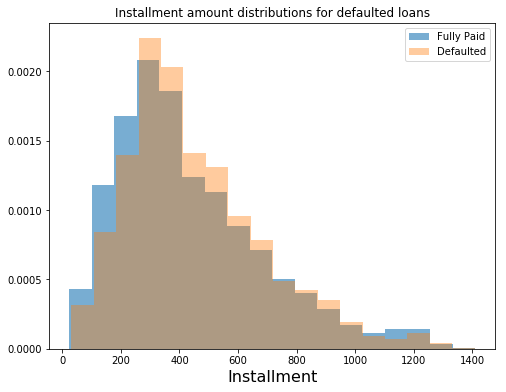

In [10]:
fig = plt.figure(figsize=(8,6));
ax = plt.subplot(1,1,1);
f_size=16;

ax.set_xlabel('Installment', fontsize= f_size);
ax.set_title('Installment amount distributions for defaulted loans')

ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 0, 'installment'], bins=18, density=True, label='Fully Paid', alpha=0.6);
ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 1, 'installment'], bins=18, density=True, label='Defaulted', alpha=0.4);

ax.legend(loc='best');

plt.show()

In [11]:
#function to remove the percentages from a column
def clean_percentages(percentage):
#     print(percentage)
    result = percentage[:-1]; #get rid of percent sign
    return float(result) / 100;

In [12]:
loans_2014_all_done['interest_rate'] = loans_2014_all_done['int_rate'].map(clean_percentages)

/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


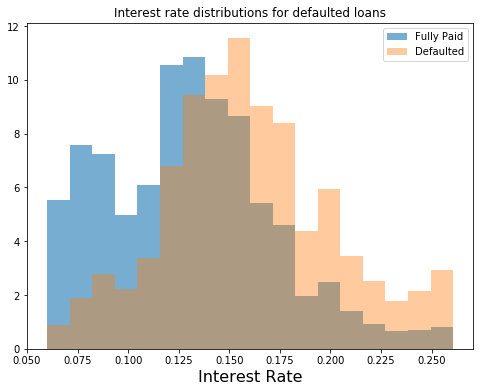

In [13]:
fig = plt.figure(figsize=(8,6));
ax = plt.subplot(1,1,1);
f_size=16;

ax.set_xlabel('Interest Rate', fontsize= f_size);
ax.set_title('Interest rate distributions for defaulted loans')

ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 0, 'interest_rate'], bins=18, density=True, label='Fully Paid', alpha=0.6);
ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 1, 'interest_rate'], bins=18, density=True, label='Defaulted', alpha=0.4);

ax.legend(loc='best');

plt.show()

In [14]:
loans_2014_all_done_grade_gb = loans_2014_all_done.groupby("grade").agg({
    'grade': ['count'],
    'interest_rate': np.mean,
    'default': [np.sum,np.mean],
});

display(loans_2014_all_done_grade_gb)

grade interest_rate default          
       count          mean     sum      mean
grade                                       
A      35810      0.074646    1948  0.054398
B      59287      0.111915    6818  0.115000
C      60718      0.141443   12246  0.201686
D      37969      0.171205   10853  0.285838
E      17661      0.203705    6600  0.373705
F       5572      0.242518    2283  0.409727
G       1482      0.258666     733  0.494602

In [15]:
loans_2014_all_done_purpose_gb = loans_2014_all_done.groupby("purpose").agg({
    'purpose': ['count'],
    'loan_amnt': np.mean,
    'interest_rate': np.mean,
    'default': [np.sum, np.mean],
    'dti': np.mean
});

display(loans_2014_all_done_purpose_gb)

purpose     loan_amnt interest_rate default            \
                     count          mean          mean     sum      mean   
purpose                                                                    
car                   1748   8932.193936      0.131151     244  0.139588   
credit_card          51368  14968.821543      0.118132    8227  0.160158   
debt_consolidation  132210  15034.457492      0.139066   26599  0.201188   
home_improvement     12056  14175.993281      0.140297    2102  0.174353   
house                  715  13994.195804      0.186199     167  0.233566   
major_purchase        3632  11816.547357      0.136282     656  0.180617   
medical               2230   8909.495516      0.157984     441  0.197758   
moving                1281   7562.978142      0.174381     313  0.244340   
other                 9855   9785.164891      0.159092    1910  0.193810   
renewable_energy       118  10254.449153      0.174465      24  0.203390   
small_business        2130  15578.110329      0.179358     598  0.280751   
vacation              1148   6216.811847      0.155730     200  0.174216   
wedding                  8  12393.750000      0.158988       0  0.000000   

                          dti  
                         mean  
purpose                        
car                 14.948810  
credit_card         17.808663  
debt_consolidation  18.472529  
home_improvement    15.447452  
house               15.024070  
major_purchase      15.034785  
medical             16.940870  
moving              16.402436  
other               16.997875  
renewable_energy    16.258983  
small_business      14.796939  
vacation            16.911960  
wedding             17.203750

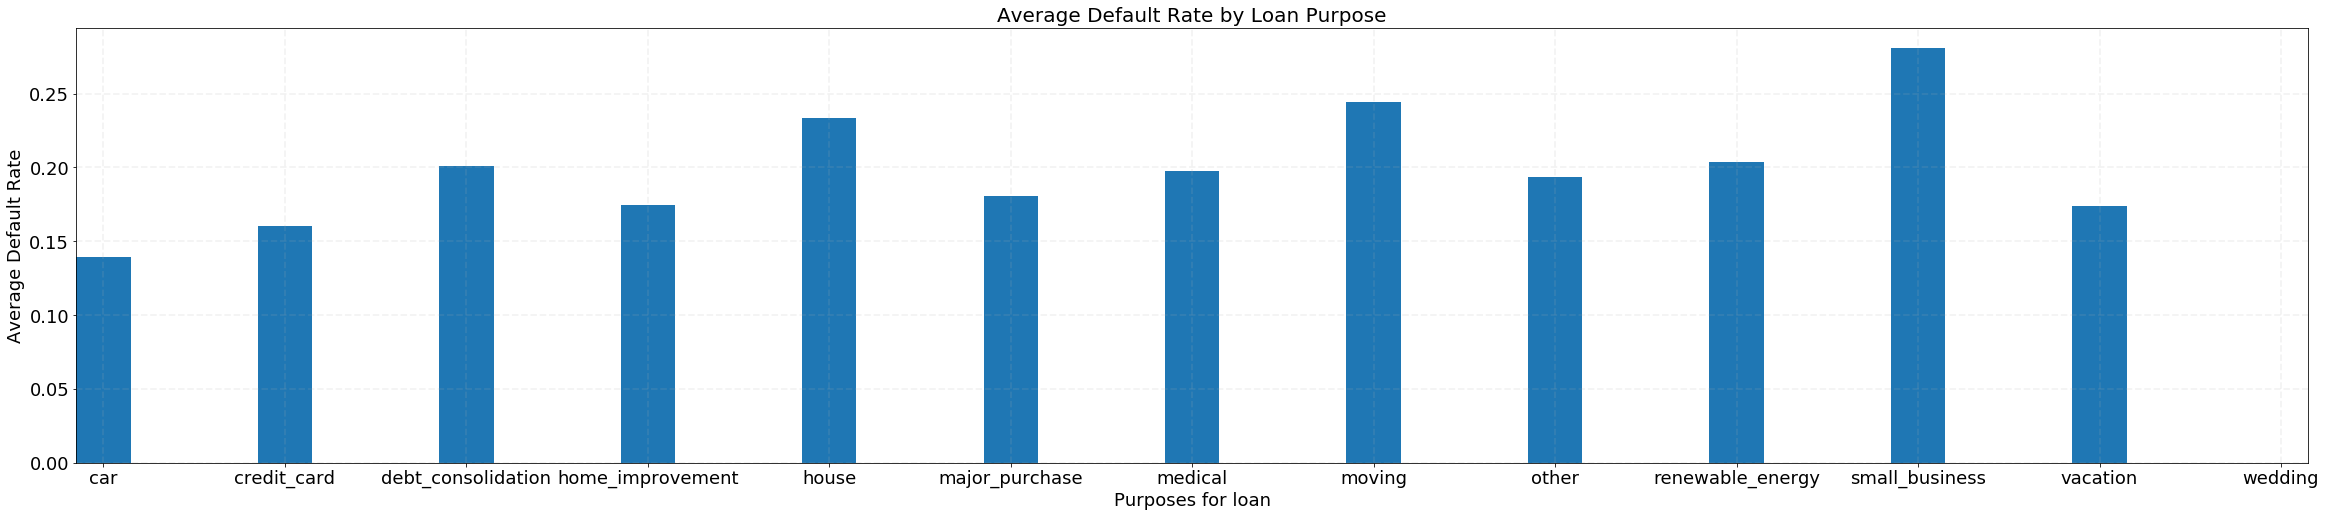

In [16]:
#plot the results

# font size
f_size = 18
x = np.arange(loans_2014_all_done_purpose_gb.shape[0]); #get x locations for groups
width = 0.3; #width of bars
# make the figure
fig = plt.figure(figsize = (40,8))
ax = plt.subplot(1,1,1) # Create figure object
ax.set_xmargin(0);

ax.bar(x, loans_2014_all_done_purpose_gb.default['mean'], width=width);
ax.set_xticks(x); #set locations of tick marks
ax.set_xticklabels(loans_2014_all_done_purpose_gb.index); #set x labels
# adjust size of labels on axes 
ax.tick_params(labelsize = f_size);
ax.grid(True, lw=1.75, ls='--', alpha=0.15); #include background grid #set axes titles
ax.set_xlabel('Purposes for loan', fontsize=f_size);
ax.set_ylabel('Average Default Rate', fontsize=f_size);
# set figure title label
ax.set_title('Average Default Rate by Loan Purpose', fontsize = 20);
# ax.legend(loc='best', fontsize = f_size);
plt.show();
# plt.savefig('Average_Interest_Rate_by_State.pdf'); #plot for report

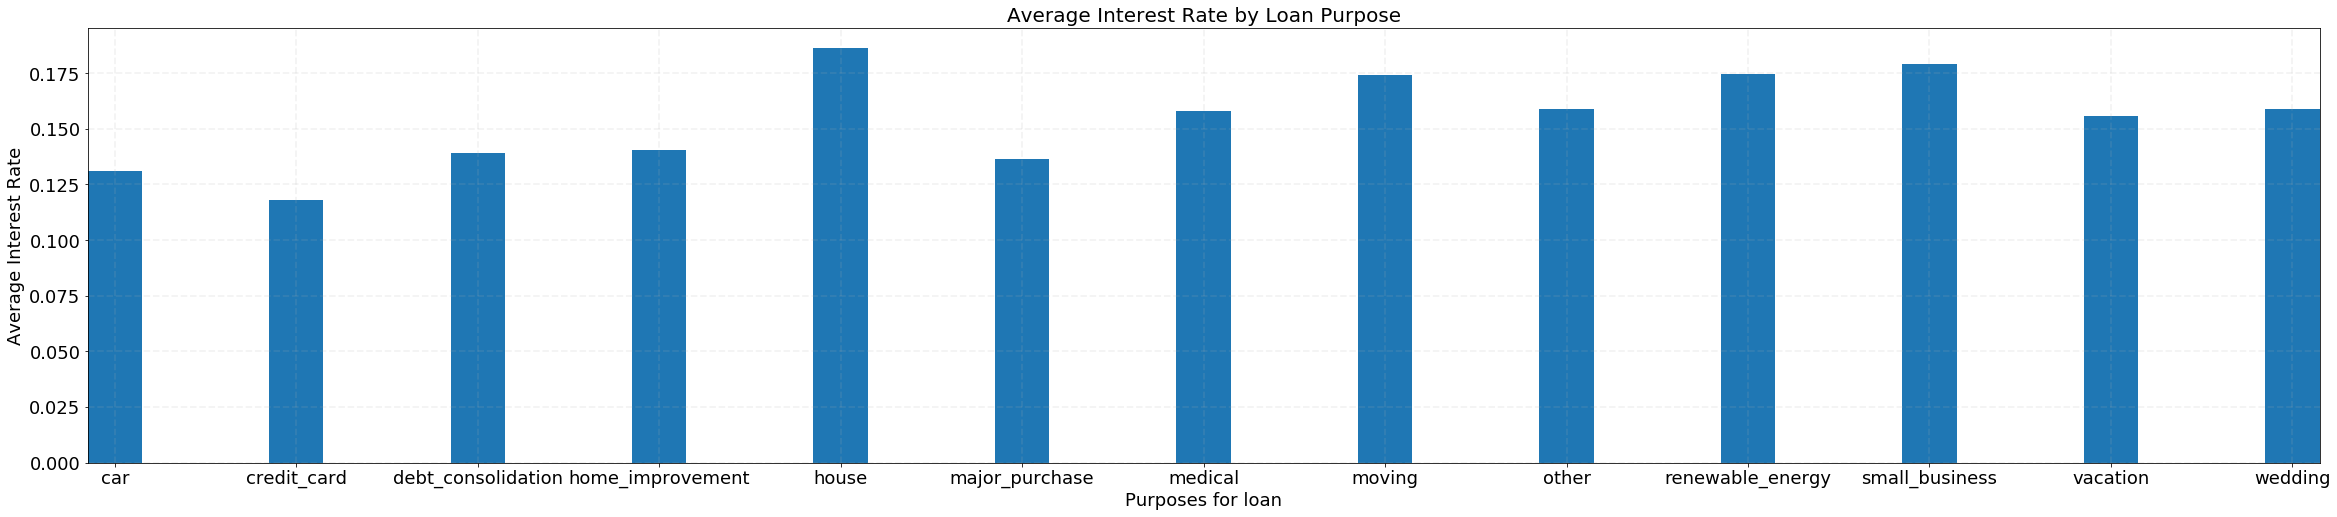

In [17]:
#plot the results

# font size
f_size = 18
x = np.arange(loans_2014_all_done_purpose_gb.shape[0]); #get x locations for groups
width = 0.3; #width of bars
# make the figure
fig = plt.figure(figsize = (40,8))
ax = plt.subplot(1,1,1) # Create figure object
ax.set_xmargin(0);

ax.bar(x, loans_2014_all_done_purpose_gb.interest_rate['mean'], width=width);
ax.set_xticks(x); #set locations of tick marks
ax.set_xticklabels(loans_2014_all_done_purpose_gb.index); #set x labels
# adjust size of labels on axes 
ax.tick_params(labelsize = f_size);
ax.grid(True, lw=1.75, ls='--', alpha=0.15); #include background grid #set axes titles
ax.set_xlabel('Purposes for loan', fontsize=f_size);
ax.set_ylabel('Average Interest Rate', fontsize=f_size);
# set figure title label
ax.set_title('Average Interest Rate by Loan Purpose', fontsize = 20);
# ax.legend(loc='best', fontsize = f_size);
plt.show();
# plt.savefig('Average_Interest_Rate_by_State.pdf'); #plot for report

In [18]:
loans_2014_all_done.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default,interest_rate
0,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42.0,NaN,17,0,6133,31.6%,36,w,0.0,0.0,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0699
1,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,0.0,0.0,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,0.1239
3,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,Dec-2014,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0,Aug-2002,1,NaN,NaN,11,0,16822,91.9%,20,f,0.0,0.0,2281.98,2281.98,704.38,339.61,0.0,1237.99,222.8382,A

In [19]:
#calculate number of years of credit history
def extract_year(date_str):
    tokens = date_str.split('-');
    return int(tokens[1]);

In [20]:
print("Entries with Null in 'earliest_cr_line'")
display(loans_2014_all_done.loc[loans_2014_all_done.earliest_cr_line.isnull()]);

print("Entries with Null in 'issue_d'")
display(loans_2014_all_done.loc[loans_2014_all_done.issue_d.isnull()]);


Entries with Null in 'earliest_cr_line'


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default,interest_rate


Entries with Null in 'issue_d'


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default,interest_rate


In [21]:
#extract years for 'earlist_cr_line' and 'issue_d'
loans_2014_all_done['earliest_cr_line_year'] = loans_2014_all_done['earliest_cr_line'].map(extract_year);
loans_2014_all_done['issue_d_year'] = loans_2014_all_done['issue_d'].map(extract_year);

#get number of years of credit history
loans_2014_all_done['cr_hist_years'] = loans_2014_all_done['issue_d_year'] - loans_2014_all_done['earliest_cr_line_year'];

display(loans_2014_all_done.head())


/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default,interest_rate,earliest_cr_line_year,issue_d_year,cr_hist_years
0,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-1989,2,42.0,NaN,17,0,6133,31.6%,36,w,0.0,0.0,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0699,1989,2014,25
1,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-1994,0,NaN,NaN,6,0,138008,29%,17,w,0.0,0.0,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,0.1239,1994,2014,20
3,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,Dec-2014,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0,Aug-2002,1,NaN,NaN,11,0,16

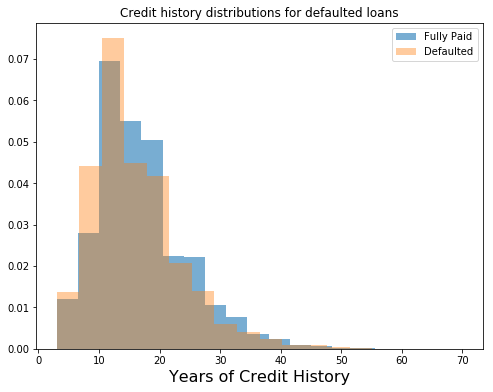

In [22]:
fig = plt.figure(figsize=(8,6));
ax = plt.subplot(1,1,1);
f_size=16;

ax.set_xlabel('Years of Credit History', fontsize= f_size);
ax.set_title('Credit history distributions for defaulted loans')

ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 0, 'cr_hist_years'], bins=18, density=True, label='Fully Paid', alpha=0.6);
ax.hist(loans_2014_all_done.loc[loans_2014_all_done.default == 1, 'cr_hist_years'], bins=18, density=True, label='Defaulted', alpha=0.4);

ax.legend(loc='best');

plt.show()